In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [2]:
data = pd.read_excel("dd.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
0,3,5,4,5.0,3,3,4,3,3,5,3,3
1,4,4,3,4.0,4,5,5,3,3,5,4,4
2,5,5,5,5.0,5,5,5,5,5,5,5,5
3,4,4,4,5.0,4,3,4,3,4,3,4,4
4,3,4,5,5.0,5,4,4,4,4,4,5,5


In [3]:
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,Y1,Y2
0,3,5,4,3,3,4,3,3,5,3,3
1,4,4,3,4,5,5,3,3,5,4,4
2,5,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,3,4,3,4,3,4,4
4,3,4,5,5,4,4,4,4,4,5,5


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [5]:
from sklearn import preprocessing
import pandas as pd

X=pd.DataFrame(data, columns=["X1","X2","X3","X5","X6","X7","X8","X9","X10"])
Y=pd.DataFrame(data, columns=["Y1"])

In [6]:
# 데이터 준비
dfX0 = pd.DataFrame(data, columns = ["X1","X2","X3","X5","X6","X7","X8","X9","X10"]) # 독립변수
dfX = sm.add_constant(dfX0) # 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다.
dfy = pd.DataFrame(data, columns = ["Y1"]) # 종속변수

In [7]:
# model_airbnb라는 이름으로 OLS 모델 구조화# model 
model = sm.OLS(dfy, dfX) # (종속변수, 독립변수)

# OLS 회귀모형 피팅
result = model.fit()


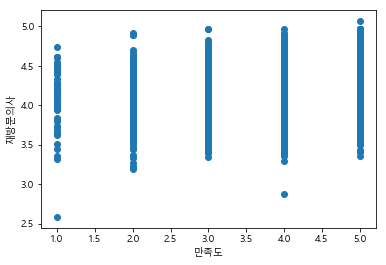

In [9]:
dfy_new = result.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"만족도")
plt.ylabel(u"재방문의사")
plt.show()

- 산점도 분석
    - 2016년 외래관광객 12,002명의 국내여행 만족도는 아래 다섯 가지 지표로 평가했다.
    1. 매우 불만족
    2. 불만족
    3. 보통
    4. 만족
    5. 매우 만족
- 조사 결과 응답자 만족도와 3년 내 재방문 의사가 보통, 만족, 매우 만족 항목에 집중적으로 분포됐다. 순서대로 만족도 ▲보통 (12.6%) ▲만족(41.5%), ▲매우 만족(41.9%), 재방문 의사 ▲ 보통(12%), ▲그렇다(42.7%), ▲매우 그렇다(42.2).
- 이를 통해 다수의 외국인 관광객들이 국내 여행에 대한 만족도가 높고, 이에 따른 재방문 의사 또한 긍정적으로 바라보는 것으로 보인다.
- 향후 한국 여행 추천 의사에 대한 응답 결과는 순서대로 ▲보통(9.2%), ▲그렇다(48.4%), ▲매우 그렇다(41.4%)에 몰려있는 것으로 보아 국내여행을 온 외래 관광객들이 주변 외국인 친구들에게 좋았던 코스나 여행 팁을 적극 추천해줄 것으로 예상할 수 있다.